In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
#upload the json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adharsharamesh","key":"5bc48a4ba0879ba883521fcf35ec0b15"}'}

In [ ]:
#make directory for kaggle
!mkdir ~/.kaggle


In [ ]:
#copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [1]:
#to list all datasets in the kaggle
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
#download the dataset using api command
! kaggle datasets download -d akash2907/bird-species-classification

100% 1.37G/1.37G [00:40<00:00, 38.4MB/s]
100% 1.37G/1.37G [00:40<00:00, 36.6MB/s]


In [ ]:
!unzip /content/bird-species-classification.zip

Archive:  /content/bird-species-classification.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: t

In [ ]:
#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen=ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen=ImageDataGenerator(rescale=(1./255)) #rescale-->normalisation only

In [ ]:
train=train_gen.flow_from_directory('/content/train_data/train_data',
                                    target_size=(120, 120),
                                    class_mode='categorical',
                                    batch_size=8)
test=test_gen.flow_from_directory('/content/test_data/test_data',
                                  target_size=(120, 120),
                                    class_mode='categorical',
                                    batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices,test.class_indices

({'blasti': 0,
  'bonegl': 1,
  'brhkyt': 2,
  'cbrtsh': 3,
  'cmnmyn': 4,
  'gretit': 5,
  'hilpig': 6,
  'himbul': 7,
  'himgri': 8,
  'hsparo': 9,
  'indvul': 10,
  'jglowl': 11,
  'lbicrw': 12,
  'mgprob': 13,
  'rebimg': 14,
  'wcrsrt': 15},
 {'blasti': 0,
  'bonegl': 1,
  'brhkyt': 2,
  'cbrtsh': 3,
  'cmnmyn': 4,
  'gretit': 5,
  'hilpig': 6,
  'himbul': 7,
  'himgri': 8,
  'hsparo': 9,
  'indvul': 10,
  'jglowl': 11,
  'lbicrw': 12,
  'mgprob': 13,
  'rebimg': 14,
  'wcrsrt': 15})

In [ ]:
#build the cnn model
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential()
#convolution layer
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3))) #3-->color image.1-->grayscale
#max_pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#flattened layer
model.add(Flatten())
#fully connected(ANN)
model.add(Dense(45,activation='relu')) #1st hidden layer
model.add(Dense(16,activation='softmax')) #output layer 16--> 16classes only

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 131s 7s/step - loss: 3.5369 - accuracy: 0.0800 - val_loss: 2.7961 - val_accuracy: 0.0573
Epoch 2/10
19/19 [==============================] - 125s 7s/step - loss: 2.6784 - accuracy: 0.0867 - val_loss: 2.6964 - val_accuracy: 0.1274
Epoch 3/10
19/19 [==============================] - 126s 7s/step - loss: 2.5018 - accuracy: 0.1733 - val_loss: 2.7224 - val_accuracy: 0.0828
Epoch 4/10
19/19 [==============================] - 101s 5s/step - loss: 2.3143 - accuracy: 0.2067 - val_loss: 2.7038 - val_accuracy: 0.0955
Epoch 5/10
19/19 [==============================] - 101s 6s/step - loss: 2.0884 - accuracy: 0.3467 - val_loss: 2.7396 - val_accuracy: 0.1720
Epoch 6/10
19/19 [==============================] - 101s 5s/step - loss: 1.8215 - accuracy: 0.4667 - val_loss: 2.7871 - val_accuracy: 0.1529
Epoch 7/10
19/19 [==============================] - 102s 6s/step - loss: 1.6364 - accuracy: 0.5067 - val_loss: 3.0819 - val_accuracy: 0.1911
Epoch 8/10
19

In [ ]:
model.save('birdspecies') #it will save the model in the local system

In [ ]:
#predict the model with real time image rat
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img=image.load_img('/content/bbdsss.jpg',target_size=(120,120))

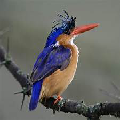

In [ ]:
img

In [ ]:
#convert the image to array
img=image.img_to_array(img)
img

array([[[ 98., 104., 100.],
        [ 97., 103.,  99.],
        [ 97., 103.,  99.],
        ...,
        [123., 126., 119.],
        [123., 126., 119.],
        [125., 128., 121.]],

       [[ 98., 104., 100.],
        [ 97., 103.,  99.],
        [ 98., 104., 100.],
        ...,
        [123., 126., 119.],
        [123., 126., 119.],
        [122., 125., 118.]],

       [[ 99., 105., 101.],
        [ 98., 104., 100.],
        [ 98., 104., 100.],
        ...,
        [123., 126., 119.],
        [123., 126., 119.],
        [122., 125., 118.]],

       ...,

       [[103., 105., 102.],
        [103., 105., 102.],
        [104., 106., 103.],
        ...,
        [109., 112., 103.],
        [ 68.,  71.,  62.],
        [ 45.,  48.,  39.]],

       [[103., 105., 102.],
        [103., 105., 102.],
        [104., 106., 103.],
        ...,
        [111., 114., 105.],
        [ 98., 101.,  92.],
        [ 89.,  92.,  83.]],

       [[104., 106., 103.],
        [104., 106., 103.],
        [105., 1

In [ ]:
#expand the dimension from 2 to 3 because we use 3 channel rgb for tha model
img=np.expand_dims(img,axis=0)
img

array([[[[ 98., 104., 100.],
         [ 97., 103.,  99.],
         [ 97., 103.,  99.],
         ...,
         [123., 126., 119.],
         [123., 126., 119.],
         [125., 128., 121.]],

        [[ 98., 104., 100.],
         [ 97., 103.,  99.],
         [ 98., 104., 100.],
         ...,
         [123., 126., 119.],
         [123., 126., 119.],
         [122., 125., 118.]],

        [[ 99., 105., 101.],
         [ 98., 104., 100.],
         [ 98., 104., 100.],
         ...,
         [123., 126., 119.],
         [123., 126., 119.],
         [122., 125., 118.]],

        ...,

        [[103., 105., 102.],
         [103., 105., 102.],
         [104., 106., 103.],
         ...,
         [109., 112., 103.],
         [ 68.,  71.,  62.],
         [ 45.,  48.,  39.]],

        [[103., 105., 102.],
         [103., 105., 102.],
         [104., 106., 103.],
         ...,
         [111., 114., 105.],
         [ 98., 101.,  92.],
         [ 89.,  92.,  83.]],

        [[104., 106., 103.],
       

In [ ]:
model.predict(img) #predict the model

1/1 [==============================] - 0s 287ms/step


array([[2.5451876e-37, 0.0000000e+00, 0.0000000e+00, 4.5013700e-25,
        0.0000000e+00, 1.0000000e+00, 3.2085466e-21, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.0459583e-19, 0.0000000e+00, 7.1802672e-37]],
      dtype=float32)

In [ ]:
pred=np.argmax(model.predict(img))
out=['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
out[pred]

1/1 [==============================] - 0s 33ms/step


'gretit'